In [1]:
!pwd

/work8/rad/projects/Armin


In [2]:
import sys

In [3]:
sys.path.append("/work8/rad/codes/sarracen-main/")

In [4]:
import matplotlib.pyplot as plt
import mysarracen # ignore warnings

/work8/rad/codes/sarracen-main/mysarracen/kernels/cubic_spline.py:15: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit(fastmath=True)
/work8/rad/codes/sarracen-main/mysarracen/kernels/quartic_spline.py:15: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit(fastmath=True)
/work8/rad/codes/sarracen-main/mysarracen/kernels/quintic_spline.py:15: NumbaDeprecationWa

In [5]:
mysarracen.__version__

'1000000'

---

### Plot snapshots

Plot snapshots and get the min and max of each. We will use these value to replot with fix colorbar vmin and vmax.

In [6]:
with open('filelistplot-M1A1') as f:
    files = [line.rstrip() for line in f]

0.7625996253852788 1646.2864851276806 /work8/armin/phantom/filament32/turb25_00035
0.7347517521377326 8407.958830176069 /work8/armin/phantom/filament32/turb25_00046
0.6685013395253917 7133.519229663343 /work8/armin/phantom/filament32/turb25_00074
0.7522542168680647 605.9302726533101 /work8/armin/phantom/filament29/turb22_00021
0.7330340563473045 8214.566614945521 /work8/armin/phantom/filament29/turb22_00052
0.7504398614616055 4024.0793046359768 /work8/armin/phantom/filament29/turb22_00073
0.7771810836686145 377.0832196353893 /work8/armin/phantom/filament27/turb21_00020
0.7006733881108212 29764.626105325926 /work8/armin/phantom/filament27/turb21_00040
0.7031958374933401 7515.845695539913 /work8/armin/phantom/filament27/turb21_00048
0.7899120613202589 1270.8044890564063 /work8/armin/phantom/filament31/turb24_00020
0.7453794861540084 15507.46931067723 /work8/armin/phantom/filament31/turb24_00043
0.754435456272219 3579.8618411818793 /work8/armin/phantom/filament31/turb24_00074
0.8027385244

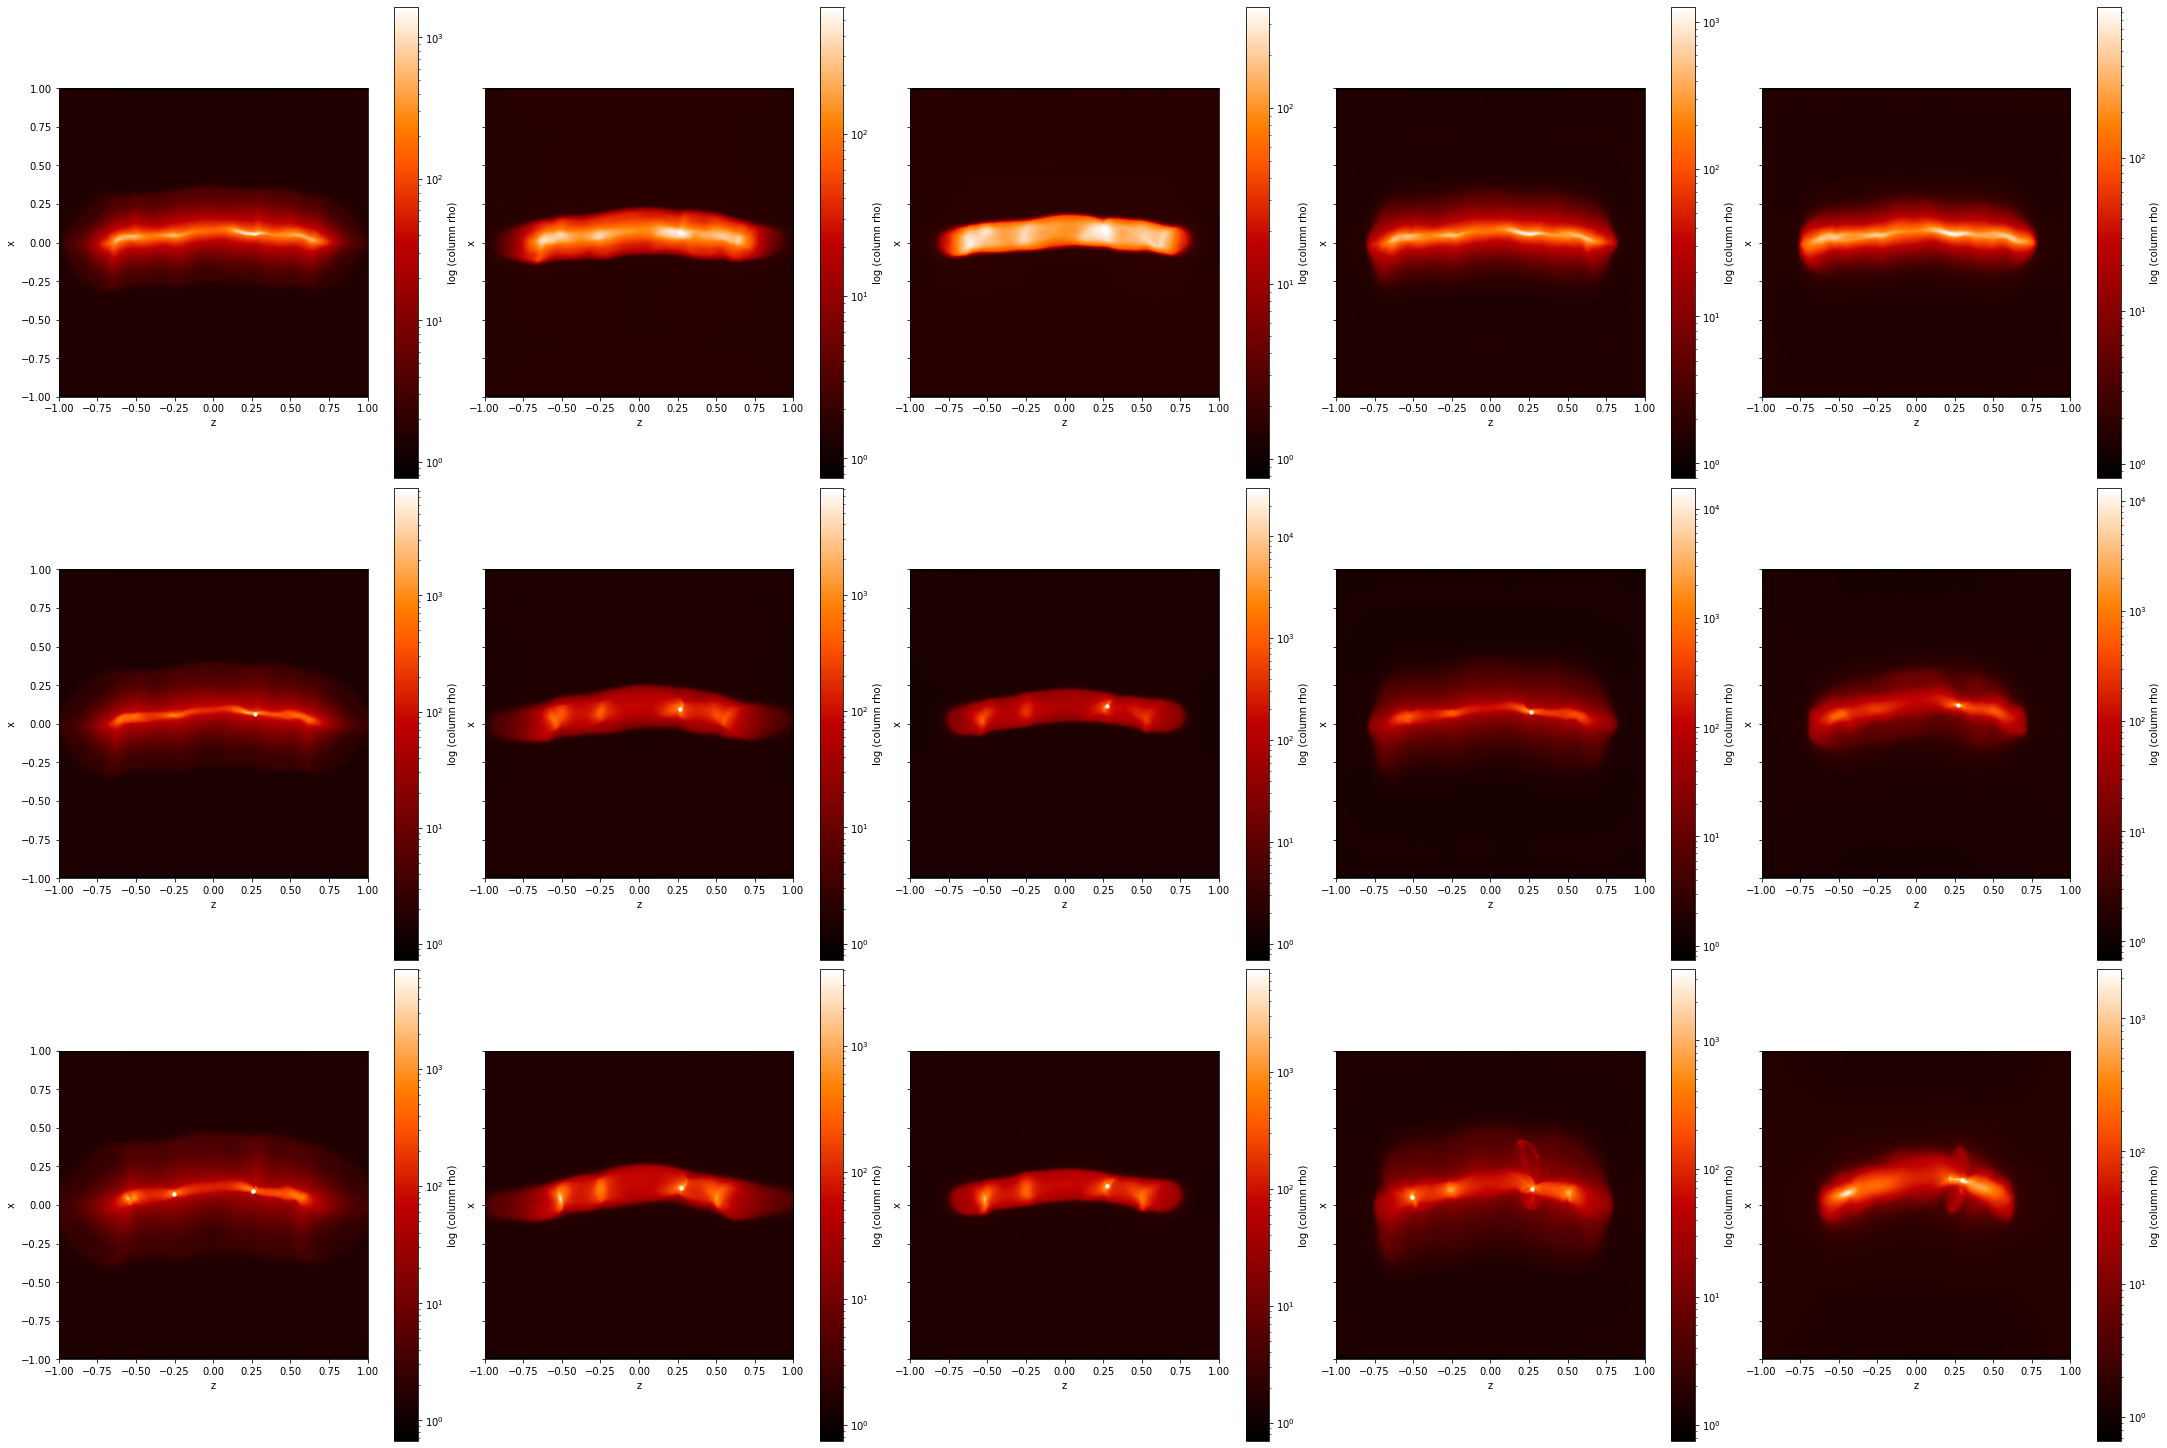

In [66]:
fig, axs = plt.subplots(3, 5, layout='constrained', figsize=(30,20),  sharey=True)
i = 0; k = 0
for j in range(5):
#     for i in [0,1,2]:
    sdf = mysarracen.read_phantom(files[k], separate_types='sinks')
    dummy, dmin, dmax = sdf.render('rho', x='z', y='x', xlim=(-1, 1), ylim=(-1, 1), 
                                               log_scale=True, x_pixels=500, y_pixels=500, ax=axs[i,j], cbar=True, vmin=vmin, vmax=vmax)
    print(dmin, dmax, files[k])
    sdf, sinks = mysarracen.read_phantom(files[k+1], separate_types='sinks')
    dummy, dmin, dmax = sdf.render('rho', x='z', y='x', xlim=(-1, 1), ylim=(-1, 1), 
                                               log_scale=True, x_pixels=500, y_pixels=500, ax=axs[i+1,j], cbar=True)
    axs[i+1,j].scatter(x=sinks['z'], y=sinks['x'], color='white', s=10)
    print(dmin, dmax, files[k+1])

    sdf, sinks = mysarracen.read_phantom(files[k+2], separate_types='sinks')
    dummy, dmin, dmax = sdf.render('rho', x='z', y='x', xlim=(-1, 1), ylim=(-1, 1), 
                                               log_scale=True, x_pixels=500, y_pixels=500, ax=axs[i+2,j], cbar=True)
    axs[i+2,j].scatter(x=sinks['z'], y=sinks['x'], color='white', s=10)
    print(dmin, dmax, files[k+2])
    
    k = k + 3

1.6120680173688464 890.5956851125928 /work8/armin/phantom/filament17/turb12_00028
1.538039181601815 59499.71990466257 /work8/armin/phantom/filament17/turb12_00054
1.4825327401673156 11497.572363097892 /work8/armin/phantom/filament17/turb12_00070
1.64444117752633 844.4794530416605 /work8/armin/phantom/filament19/turb14_00013
1.6101033862946772 226966.81986574506 /work8/armin/phantom/filament19/turb14_00050
1.6004613363975666 72643.86142032736 /work8/armin/phantom/filament19/turb14_00057
1.652468919285061 717.2736740803817 /work8/armin/phantom/filament18/turb13_00019
1.5383606312028433 31257.72050828988 /work8/armin/phantom/filament18/turb13_00046
1.5453006089372896 43513.868254029774 /work8/armin/phantom/filament18/turb13_00057
1.6202461495372553 881.2299681638214 /work8/armin/phantom/filament21/turb16_00013
1.5663848070409008 52659.83191801455 /work8/armin/phantom/filament21/turb16_00042
1.5444364915625397 20409.42139666975 /work8/armin/phantom/filament21/turb16_00059
1.630399143368653

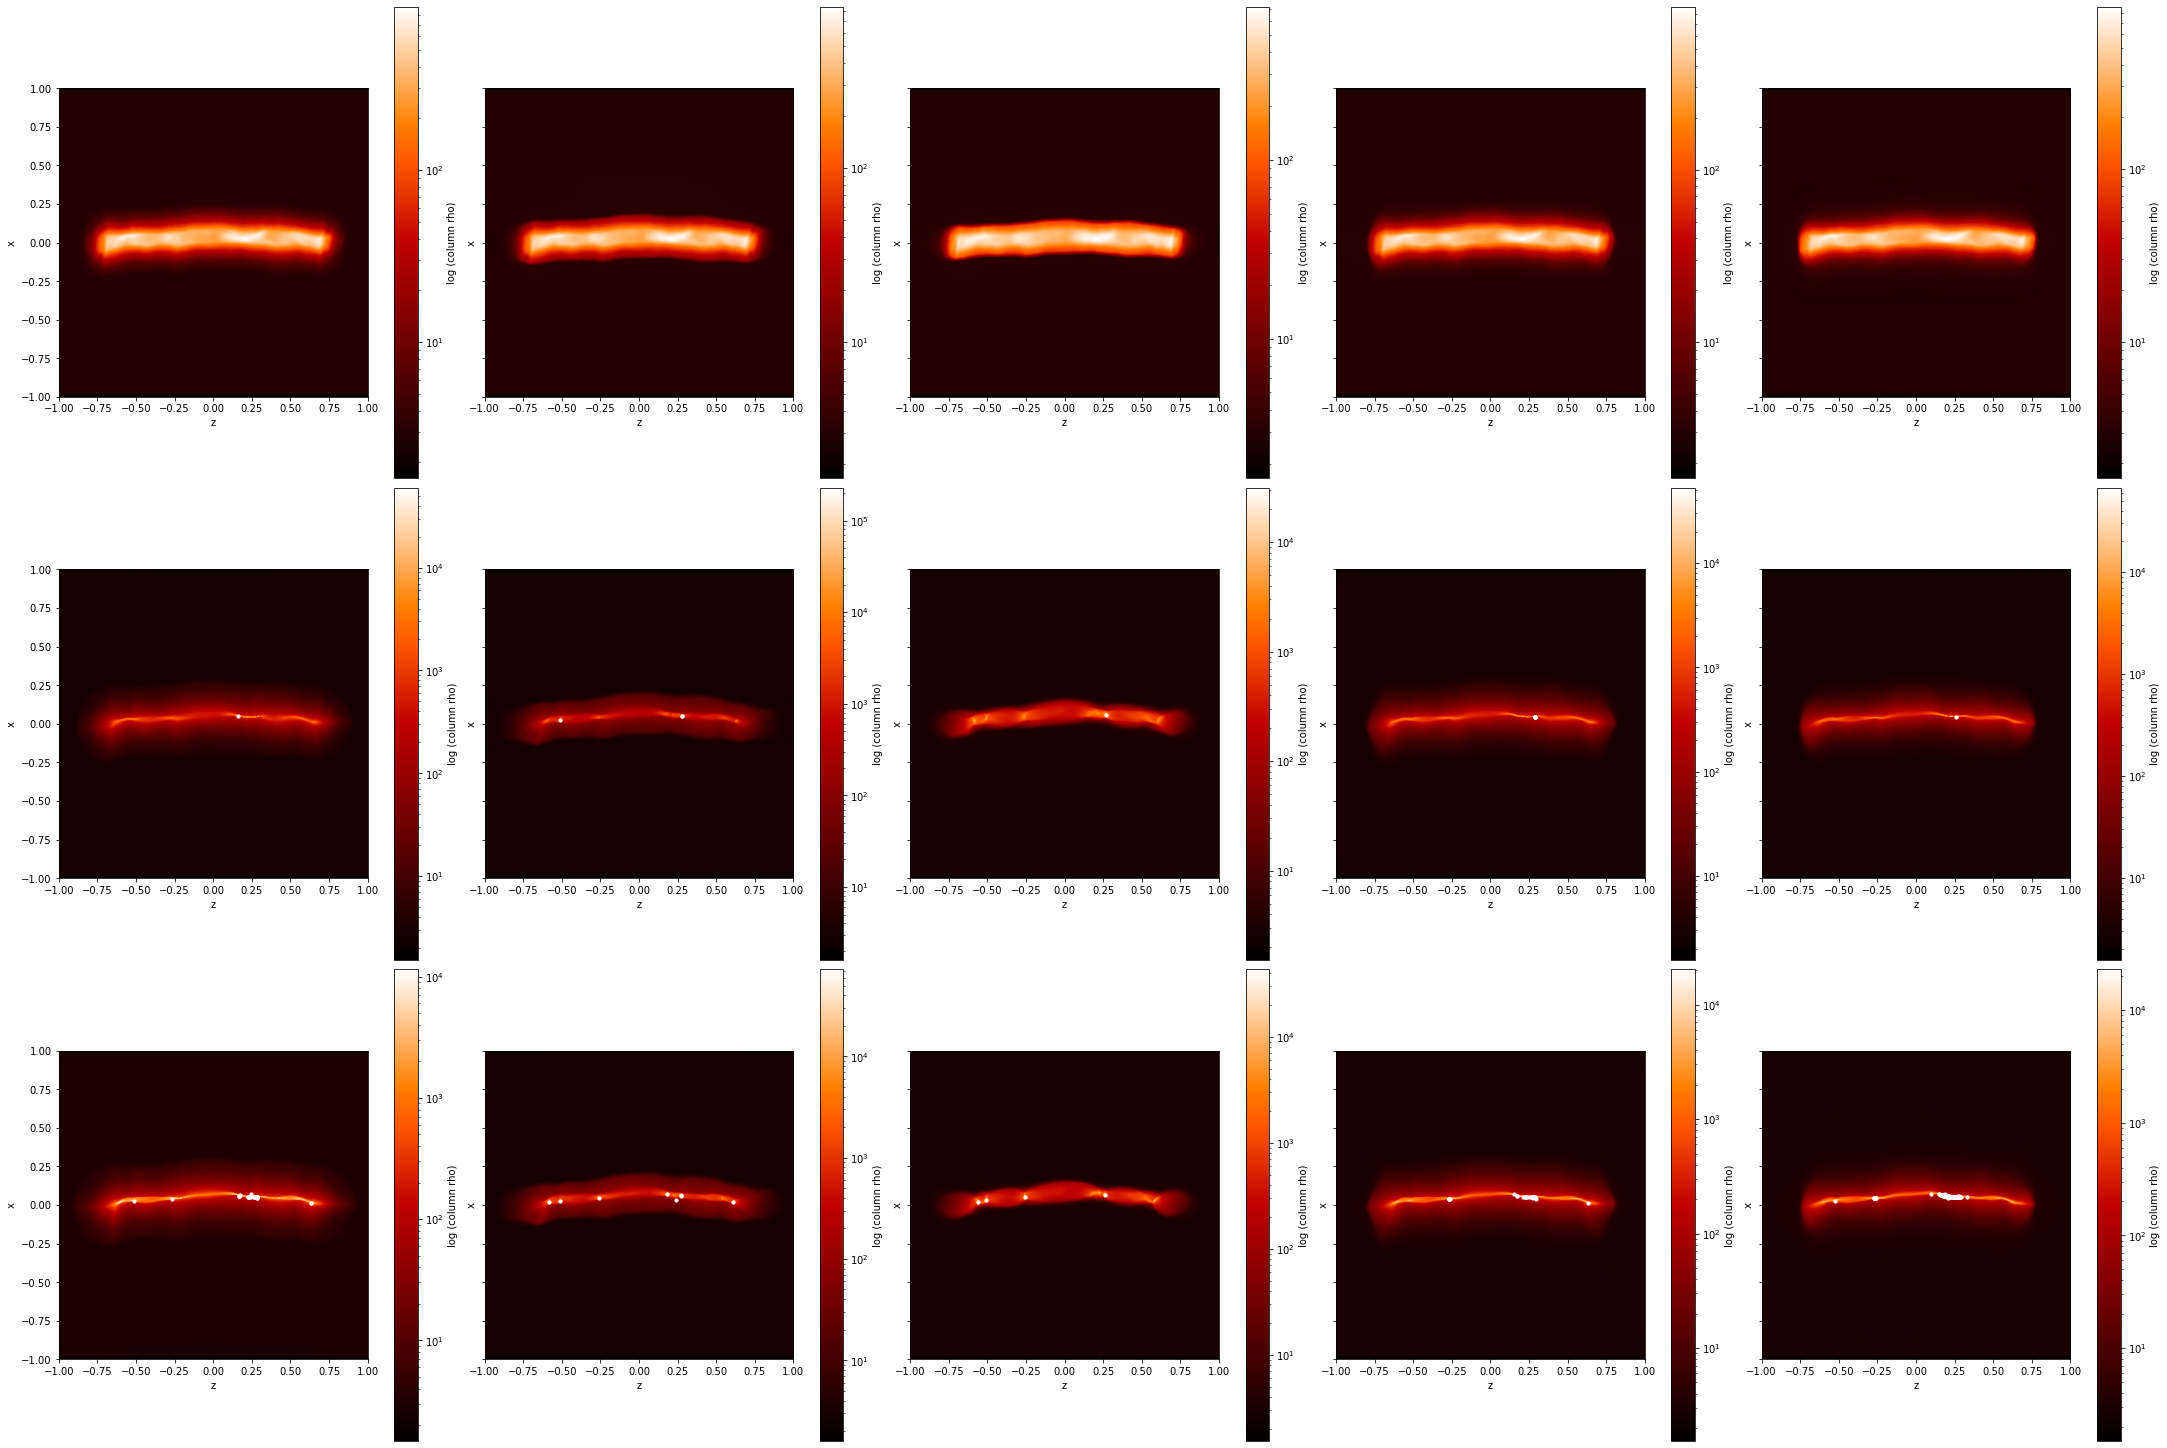

In [68]:
fig, axs = plt.subplots(3, 5, layout='constrained', figsize=(30,20),  sharey=True)
i = 0; k = 0
for j in range(5):
#     for i in [0,1,2]:
    sdf = mysarracen.read_phantom(files[k], separate_types='sinks')
    dummy, dmin, dmax = sdf.render('rho', x='z', y='x', xlim=(-1, 1), ylim=(-1, 1), 
                                               log_scale=True, x_pixels=500, y_pixels=500, ax=axs[i,j], cbar=True)
    print(dmin, dmax, files[k])
    sdf, sinks = mysarracen.read_phantom(files[k+1], separate_types='sinks')
    dummy, dmin, dmax = sdf.render('rho', x='z', y='x', xlim=(-1, 1), ylim=(-1, 1), 
                                               log_scale=True, x_pixels=500, y_pixels=500, ax=axs[i+1,j], cbar=True)
    axs[i+1,j].scatter(x=sinks['z'], y=sinks['x'], color='white', s=10)
    print(dmin, dmax, files[k+1])

    sdf, sinks = mysarracen.read_phantom(files[k+2], separate_types='sinks')
    dummy, dmin, dmax = sdf.render('rho', x='z', y='x', xlim=(-1, 1), ylim=(-1, 1), 
                                               log_scale=True, x_pixels=500, y_pixels=500, ax=axs[i+2,j], cbar=True)
    axs[i+2,j].scatter(x=sinks['z'], y=sinks['x'], color='white', s=10)
    print(dmin, dmax, files[k+2])
    
    k = k + 3

In [69]:
with open('filelistplot-M3A1') as f:
    files = [line.rstrip() for line in f]

2.469815709935449 971.9103612961618 /work8/armin/phantom/filament22/turb11_00014
2.3435450961270603 82994.41016376966 /work8/armin/phantom/filament22/turb11_00036
2.288093811148108 57703.882727841505 /work8/armin/phantom/filament22/turb11_00045
2.4901431002624244 953.0178249597662 /work8/armin/phantom/filament24/turb18_00013
2.435849291606382 18458.084324164618 /work8/armin/phantom/filament24/turb18_00041
2.4093773601511526 63886.780226849136 /work8/armin/phantom/filament24/turb18_00048
2.5046919736154605 922.7071145702769 /work8/armin/phantom/filament23/turb17_00011
2.472547530294201 41552.2108833662 /work8/armin/phantom/filament23/turb17_00041
2.4282769437925826 107154.88238115577 /work8/armin/phantom/filament23/turb17_00047
2.47207553958113 927.9776422733145 /work8/armin/phantom/filament26/turb20_00011
2.367828749308537 37248.69292373298 /work8/armin/phantom/filament26/turb20_00039
2.3393898805796263 30678.945373539937 /work8/armin/phantom/filament26/turb20_00046
2.4811043275970364 

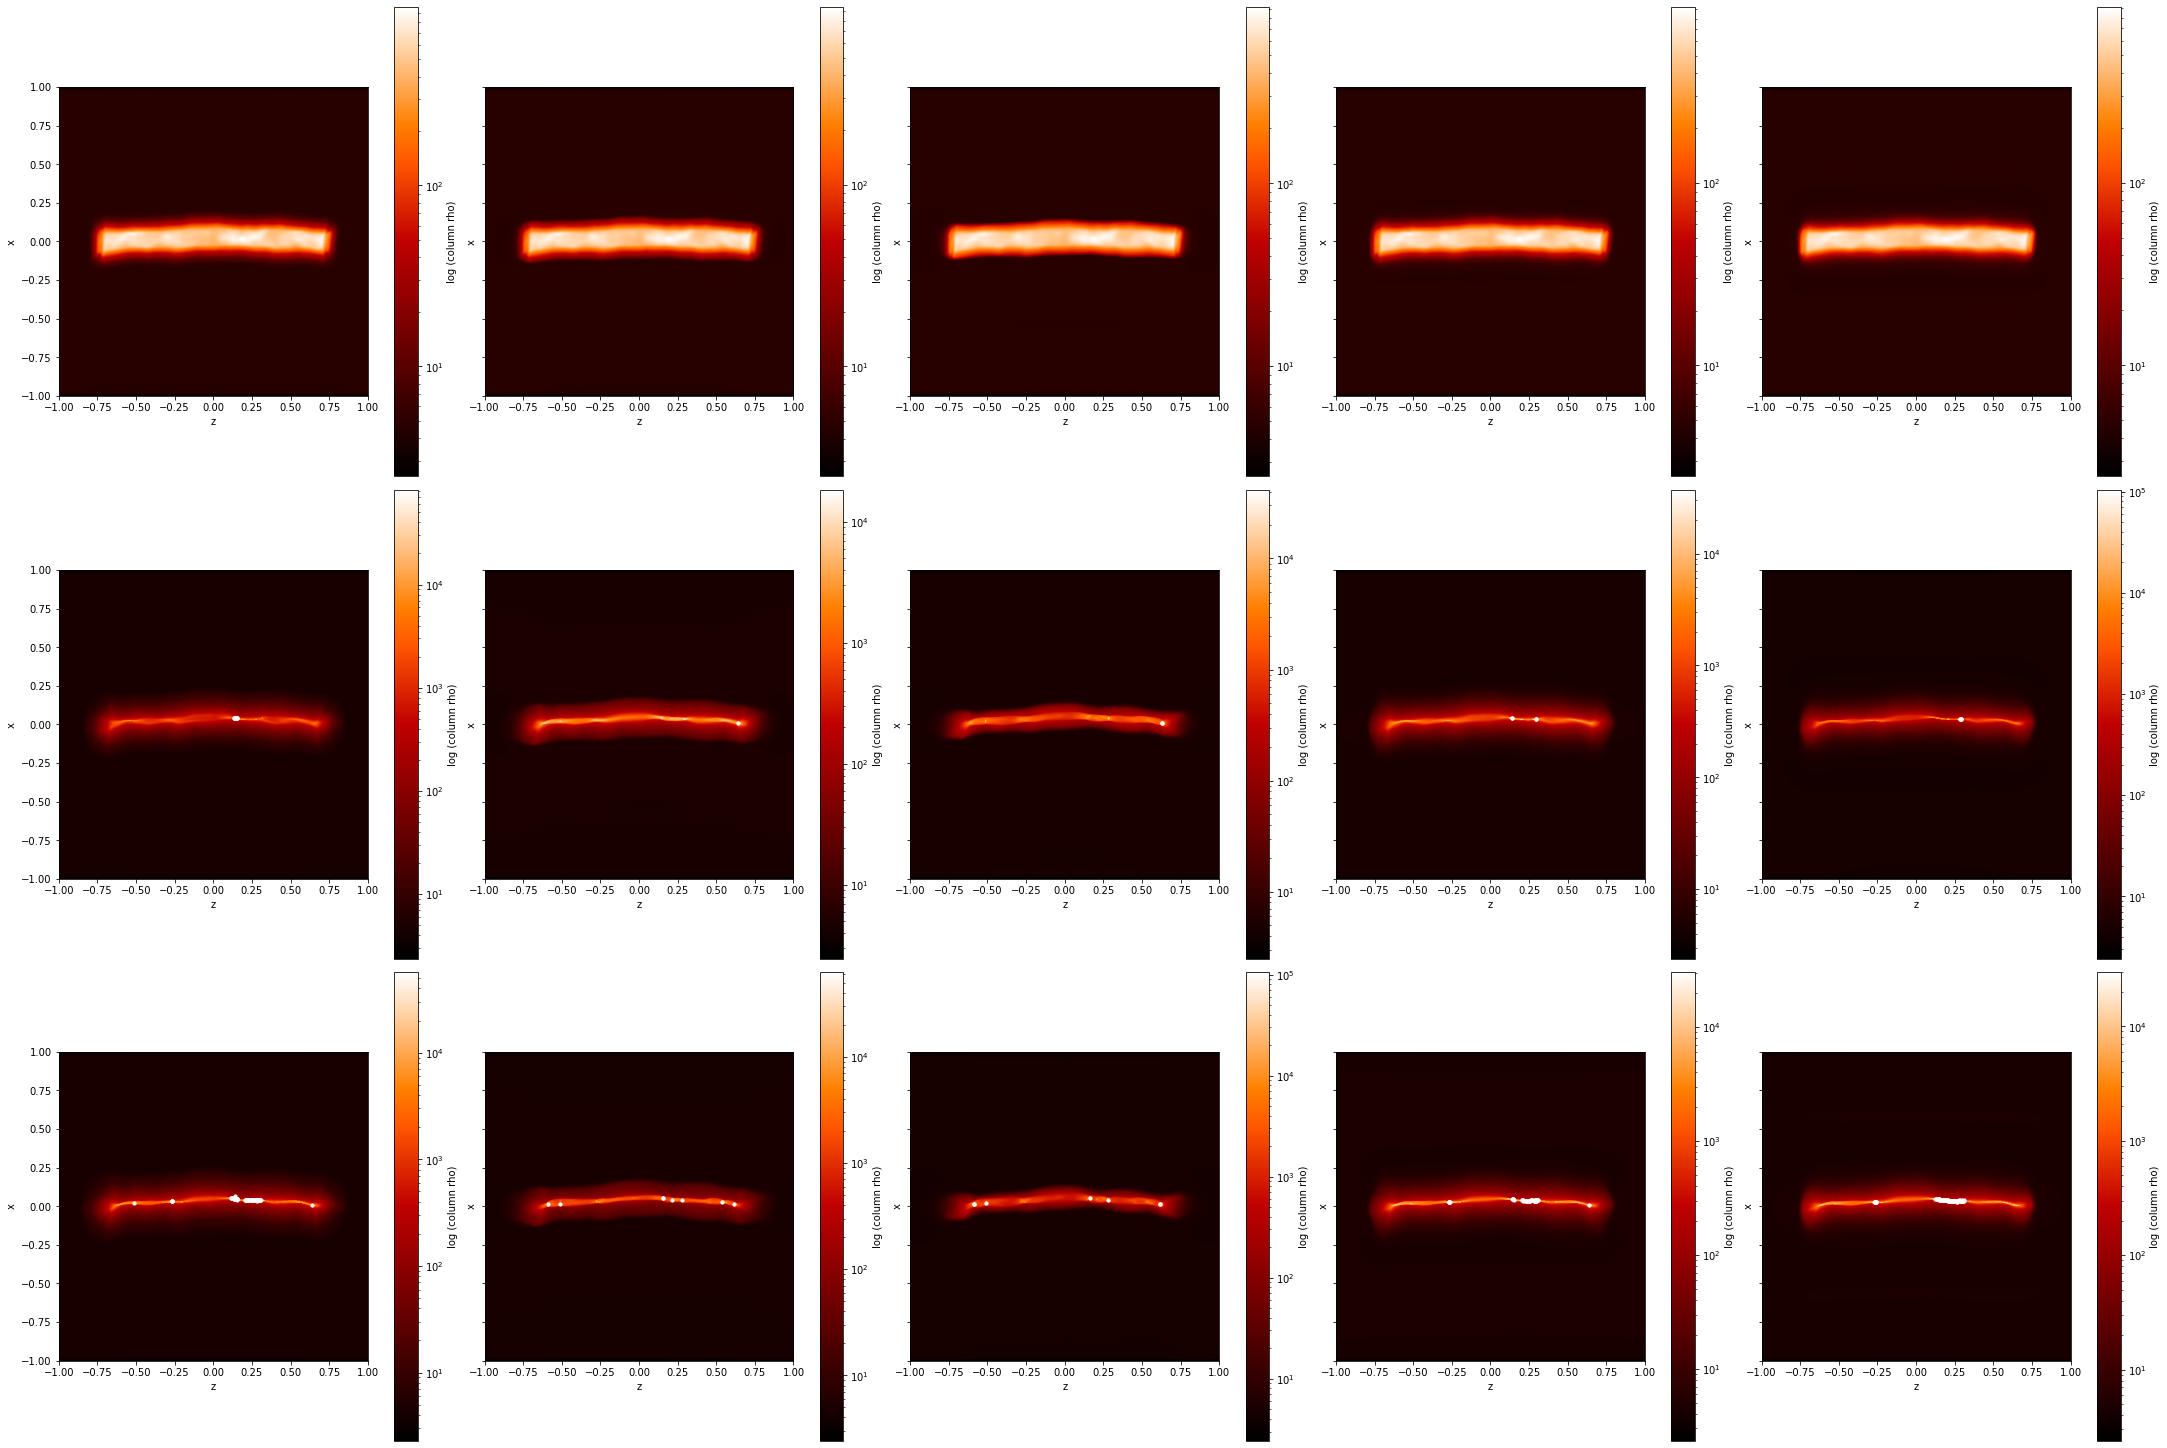

In [70]:
fig, axs = plt.subplots(3, 5, layout='constrained', figsize=(30,20),  sharey=True)
i = 0; k = 0
for j in range(5):
#     for i in [0,1,2]:
    sdf = mysarracen.read_phantom(files[k], separate_types='sinks')
    dummy, dmin, dmax = sdf.render('rho', x='z', y='x', xlim=(-1, 1), ylim=(-1, 1), 
                                               log_scale=True, x_pixels=500, y_pixels=500, ax=axs[i,j], cbar=True)
    print(dmin, dmax, files[k])
    sdf, sinks = mysarracen.read_phantom(files[k+1], separate_types='sinks')
    dummy, dmin, dmax = sdf.render('rho', x='z', y='x', xlim=(-1, 1), ylim=(-1, 1), 
                                               log_scale=True, x_pixels=500, y_pixels=500, ax=axs[i+1,j], cbar=True)
    axs[i+1,j].scatter(x=sinks['z'], y=sinks['x'], color='white', s=10)
    print(dmin, dmax, files[k+1])

    sdf, sinks = mysarracen.read_phantom(files[k+2], separate_types='sinks')
    dummy, dmin, dmax = sdf.render('rho', x='z', y='x', xlim=(-1, 1), ylim=(-1, 1), 
                                               log_scale=True, x_pixels=500, y_pixels=500, ax=axs[i+2,j], cbar=True)
    axs[i+2,j].scatter(x=sinks['z'], y=sinks['x'], color='white', s=10)
    print(dmin, dmax, files[k+2])
    
    k = k + 3

---

### Plots with equal min and max:

Now we define a function and use the min and max density derived in previous plots.

In [7]:
def plot(filelist, vmin, vmax):
    with open(filelist) as f:
        files = [line.rstrip() for line in f]
    fig, axs = plt.subplots(3, 5, layout='constrained', figsize=(30,20),  sharey=True)
    i = 0; k = 0
    for j in range(5):
    #     for i in [0,1,2]:
        sdf = mysarracen.read_phantom(files[k], separate_types='sinks')
        dummy, dmin, dmax = sdf.render('rho', x='z', y='x', xlim=(-1, 1), ylim=(-1, 1), 
                                                   log_scale=True, x_pixels=500, y_pixels=500, ax=axs[i,j], cbar=True, vmin=vmin, vmax=vmax)
        print(dmin, dmax, files[k])
        sdf, sinks = mysarracen.read_phantom(files[k+1], separate_types='sinks')
        dummy, dmin, dmax = sdf.render('rho', x='z', y='x', xlim=(-1, 1), ylim=(-1, 1), 
                                                   log_scale=True, x_pixels=500, y_pixels=500, ax=axs[i+1,j], cbar=True, vmin=vmin, vmax=vmax)
        axs[i+1,j].scatter(x=sinks['z'], y=sinks['x'], color='white', s=10)
        print(dmin, dmax, files[k+1])

        sdf, sinks = mysarracen.read_phantom(files[k+2], separate_types='sinks')
        dummy, dmin, dmax = sdf.render('rho', x='z', y='x', xlim=(-1, 1), ylim=(-1, 1), 
                                                   log_scale=True, x_pixels=500, y_pixels=500, ax=axs[i+2,j], cbar=True, vmin=vmin, vmax=vmax)
        axs[i+2,j].scatter(x=sinks['z'], y=sinks['x'], color='white', s=10)
        print(dmin, dmax, files[k+2])

        k = k + 3

0.7625996253852788 1646.2864851276806 /work8/armin/phantom/filament32/turb25_00035
0.7347517521377326 8407.958830176069 /work8/armin/phantom/filament32/turb25_00046
0.6685013395253917 7133.519229663343 /work8/armin/phantom/filament32/turb25_00074
0.7522542168680647 605.9302726533101 /work8/armin/phantom/filament29/turb22_00021
0.7330340563473045 8214.566614945521 /work8/armin/phantom/filament29/turb22_00052
0.7504398614616055 4024.0793046359768 /work8/armin/phantom/filament29/turb22_00073
0.7771810836686145 377.0832196353893 /work8/armin/phantom/filament27/turb21_00020
0.7006733881108212 29764.626105325926 /work8/armin/phantom/filament27/turb21_00040
0.7031958374933401 7515.845695539913 /work8/armin/phantom/filament27/turb21_00048
0.7899120613202589 1270.8044890564063 /work8/armin/phantom/filament31/turb24_00020
0.7453794861540084 15507.46931067723 /work8/armin/phantom/filament31/turb24_00043
0.754435456272219 3579.8618411818793 /work8/armin/phantom/filament31/turb24_00074
0.8027385244

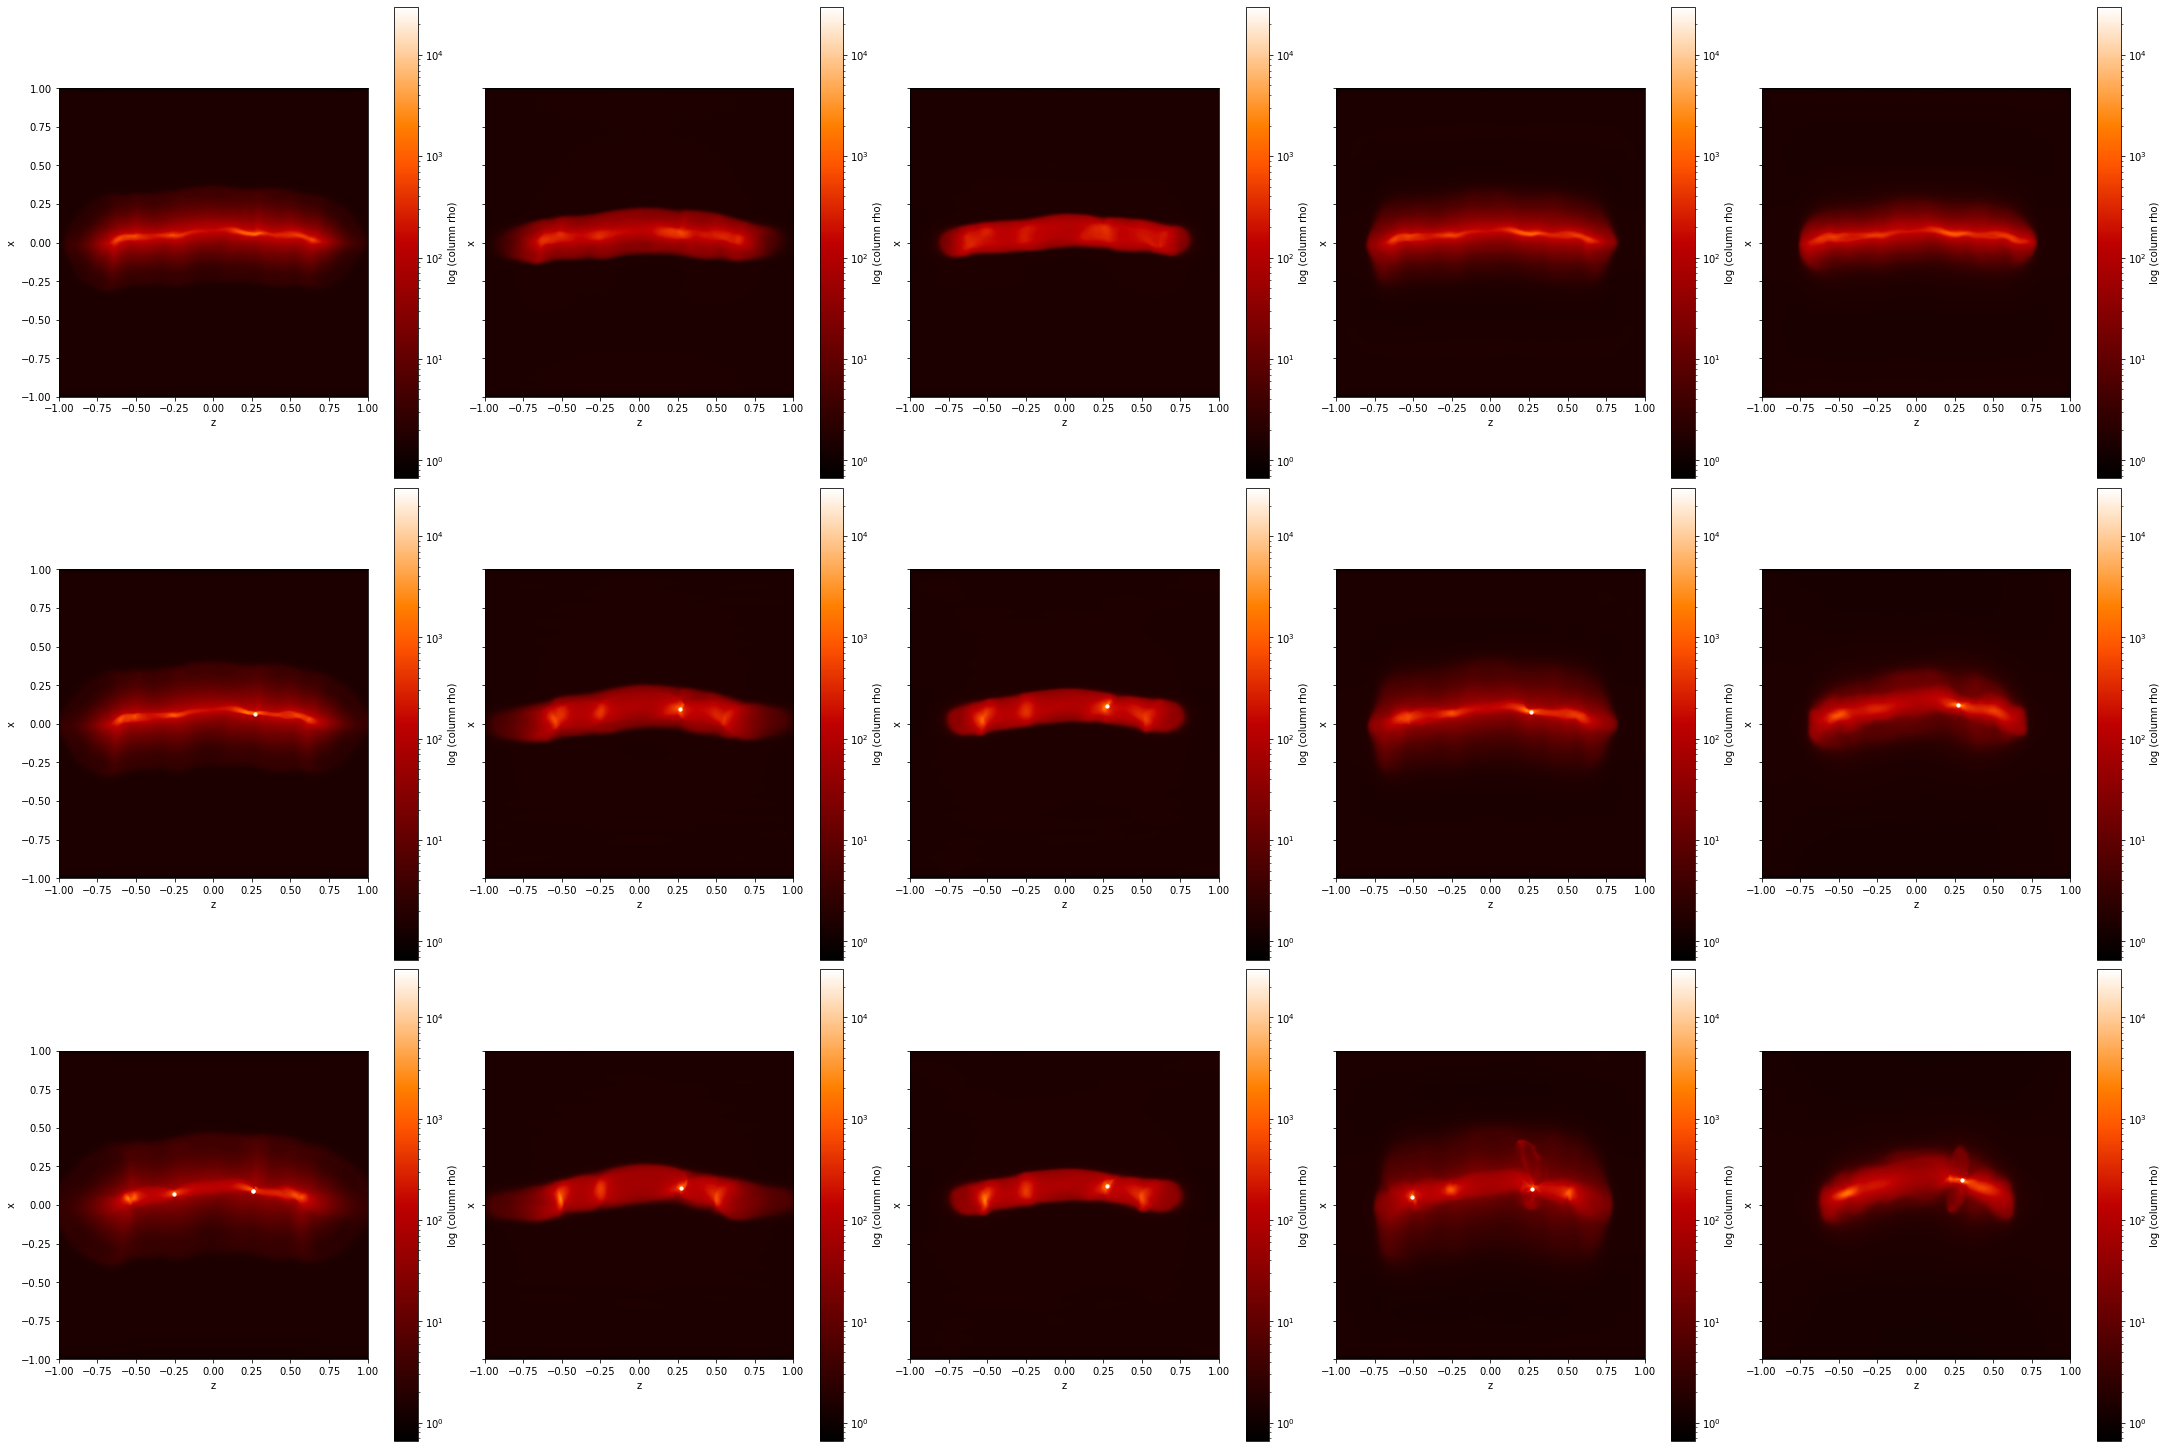

In [8]:
plot('filelistplot-M1A1', 0.6617812876348309, 29764.626105325926)

1.6120680173688464 890.5956851125928 /work8/armin/phantom/filament17/turb12_00028
1.538039181601815 59499.71990466257 /work8/armin/phantom/filament17/turb12_00054
1.4825327401673156 11497.572363097892 /work8/armin/phantom/filament17/turb12_00070
1.64444117752633 844.4794530416605 /work8/armin/phantom/filament19/turb14_00013
1.6101033862946772 226966.81986574506 /work8/armin/phantom/filament19/turb14_00050
1.6004613363975666 72643.86142032736 /work8/armin/phantom/filament19/turb14_00057
1.652468919285061 717.2736740803817 /work8/armin/phantom/filament18/turb13_00019
1.5383606312028433 31257.72050828988 /work8/armin/phantom/filament18/turb13_00046
1.5453006089372896 43513.868254029774 /work8/armin/phantom/filament18/turb13_00057
1.6202461495372553 881.2299681638214 /work8/armin/phantom/filament21/turb16_00013
1.5663848070409008 52659.83191801455 /work8/armin/phantom/filament21/turb16_00042
1.5444364915625397 20409.42139666975 /work8/armin/phantom/filament21/turb16_00059
1.630399143368653

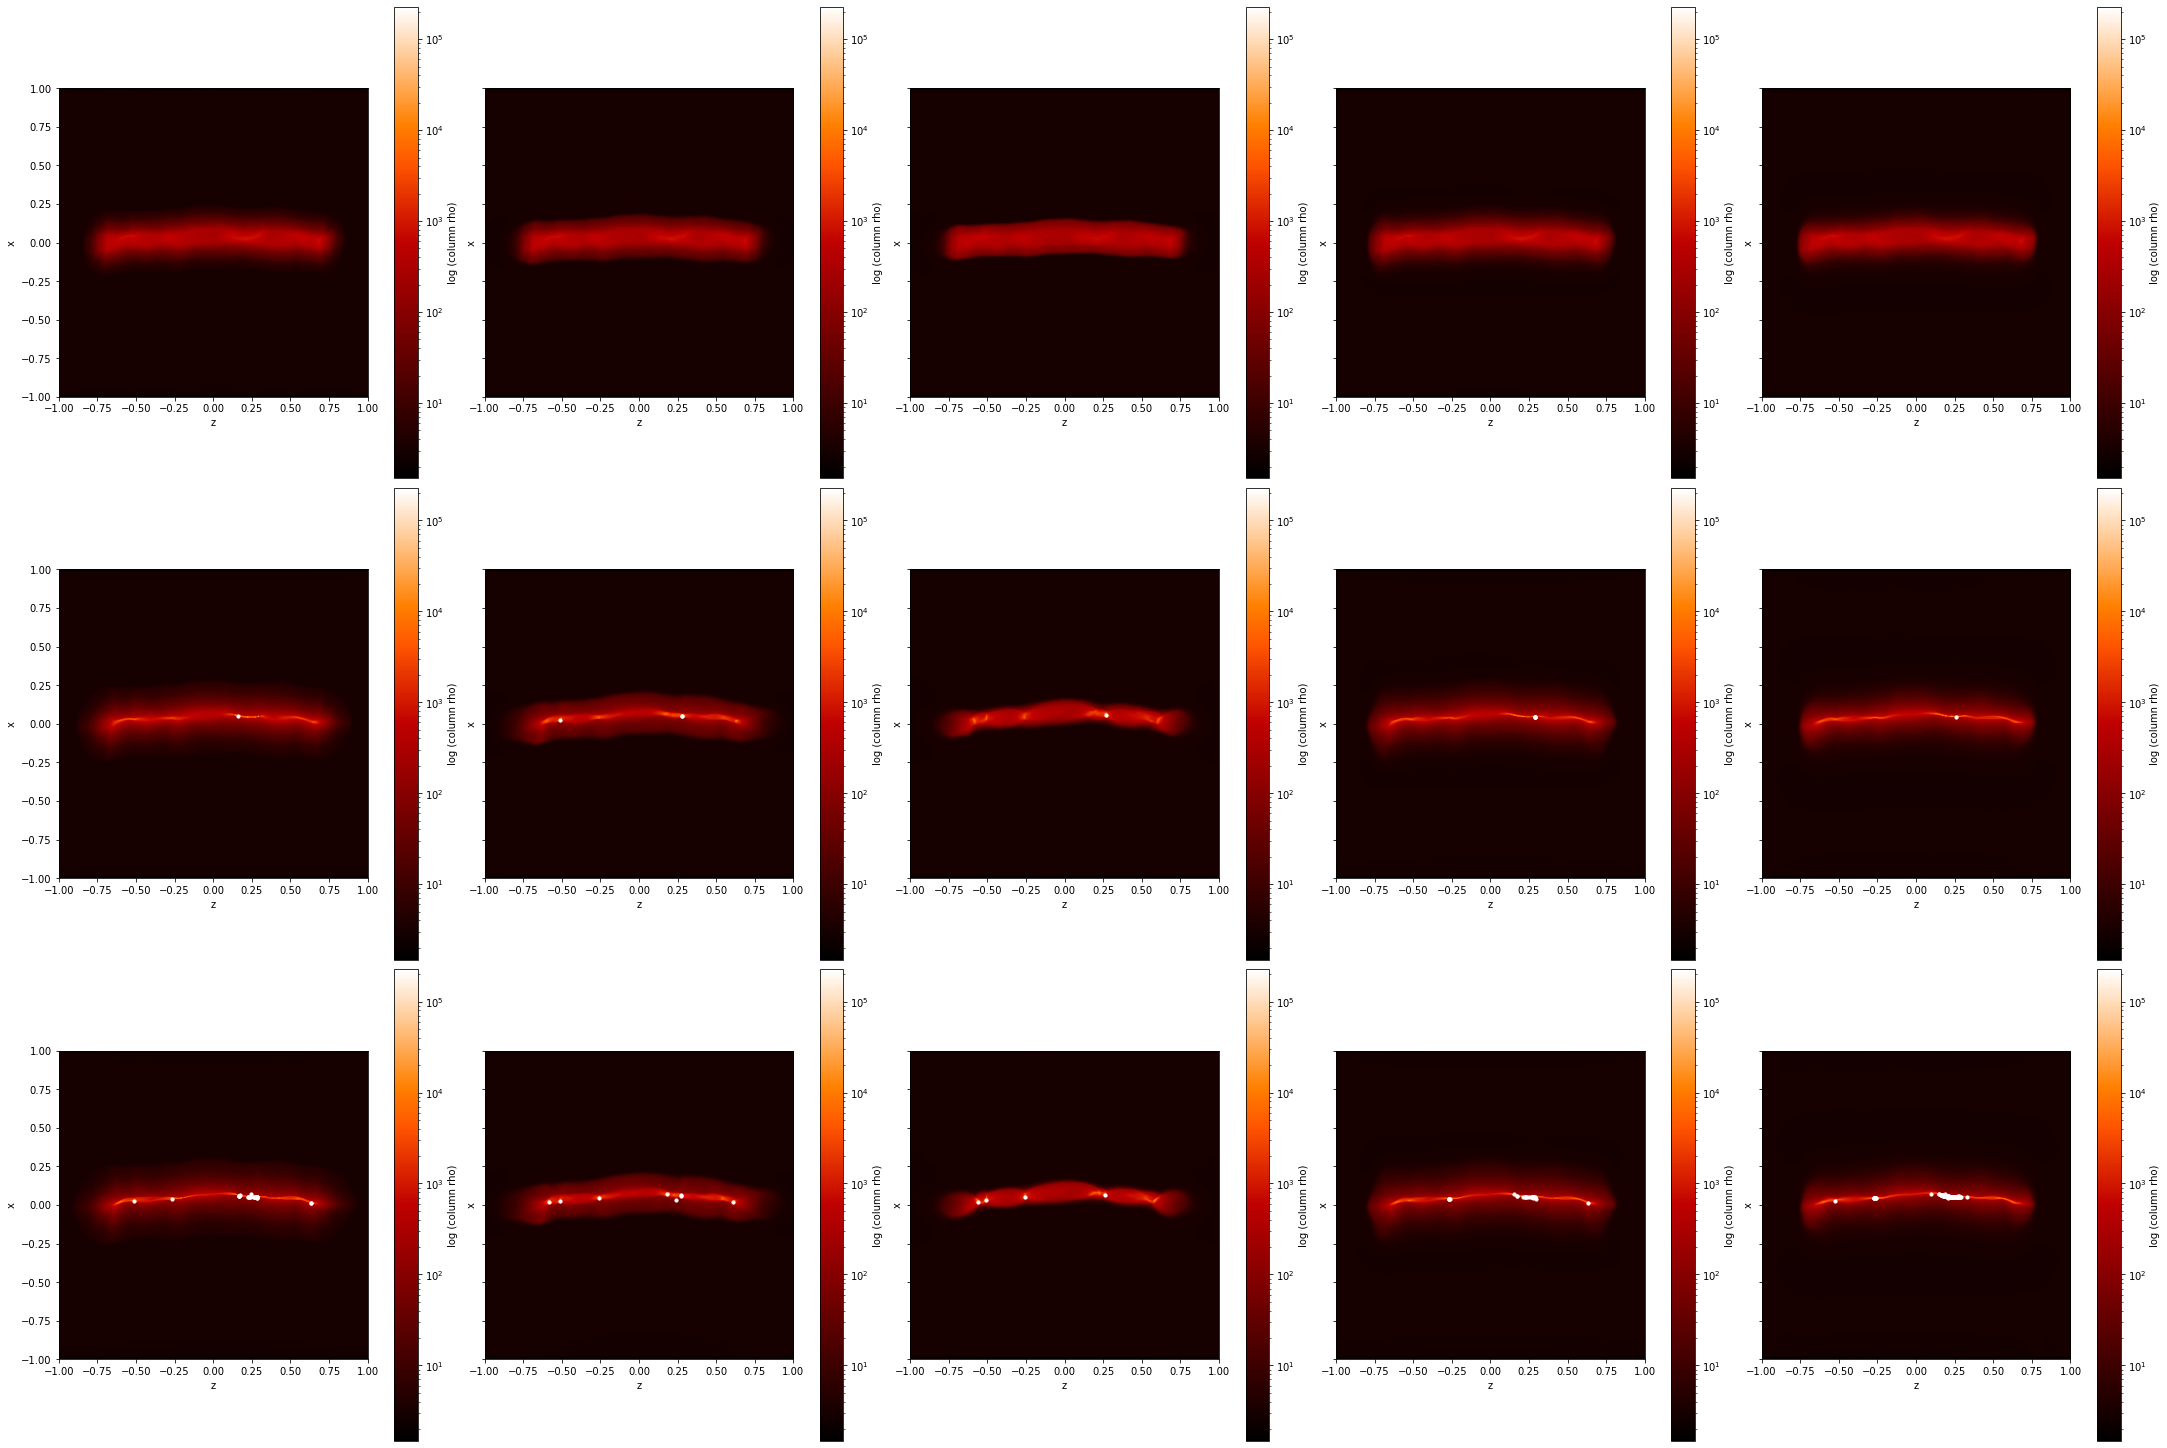

In [9]:
plot('filelistplot-M2A1', 1.4825327401673156, 226966.81986574506)

In [67]:
with open('filelistplot-M2A1') as f:
    files = [line.rstrip() for line in f]

2.469815709935449 971.9103612961618 /work8/armin/phantom/filament22/turb11_00014
2.3435450961270603 82994.41016376966 /work8/armin/phantom/filament22/turb11_00036
2.288093811148108 57703.882727841505 /work8/armin/phantom/filament22/turb11_00045
2.4901431002624244 953.0178249597662 /work8/armin/phantom/filament24/turb18_00013
2.435849291606382 18458.084324164618 /work8/armin/phantom/filament24/turb18_00041
2.4093773601511526 63886.780226849136 /work8/armin/phantom/filament24/turb18_00048
2.5046919736154605 922.7071145702769 /work8/armin/phantom/filament23/turb17_00011
2.472547530294201 41552.2108833662 /work8/armin/phantom/filament23/turb17_00041
2.4282769437925826 107154.88238115577 /work8/armin/phantom/filament23/turb17_00047
2.47207553958113 927.9776422733145 /work8/armin/phantom/filament26/turb20_00011
2.367828749308537 37248.69292373298 /work8/armin/phantom/filament26/turb20_00039
2.3393898805796263 30678.945373539937 /work8/armin/phantom/filament26/turb20_00046
2.4811043275970364 

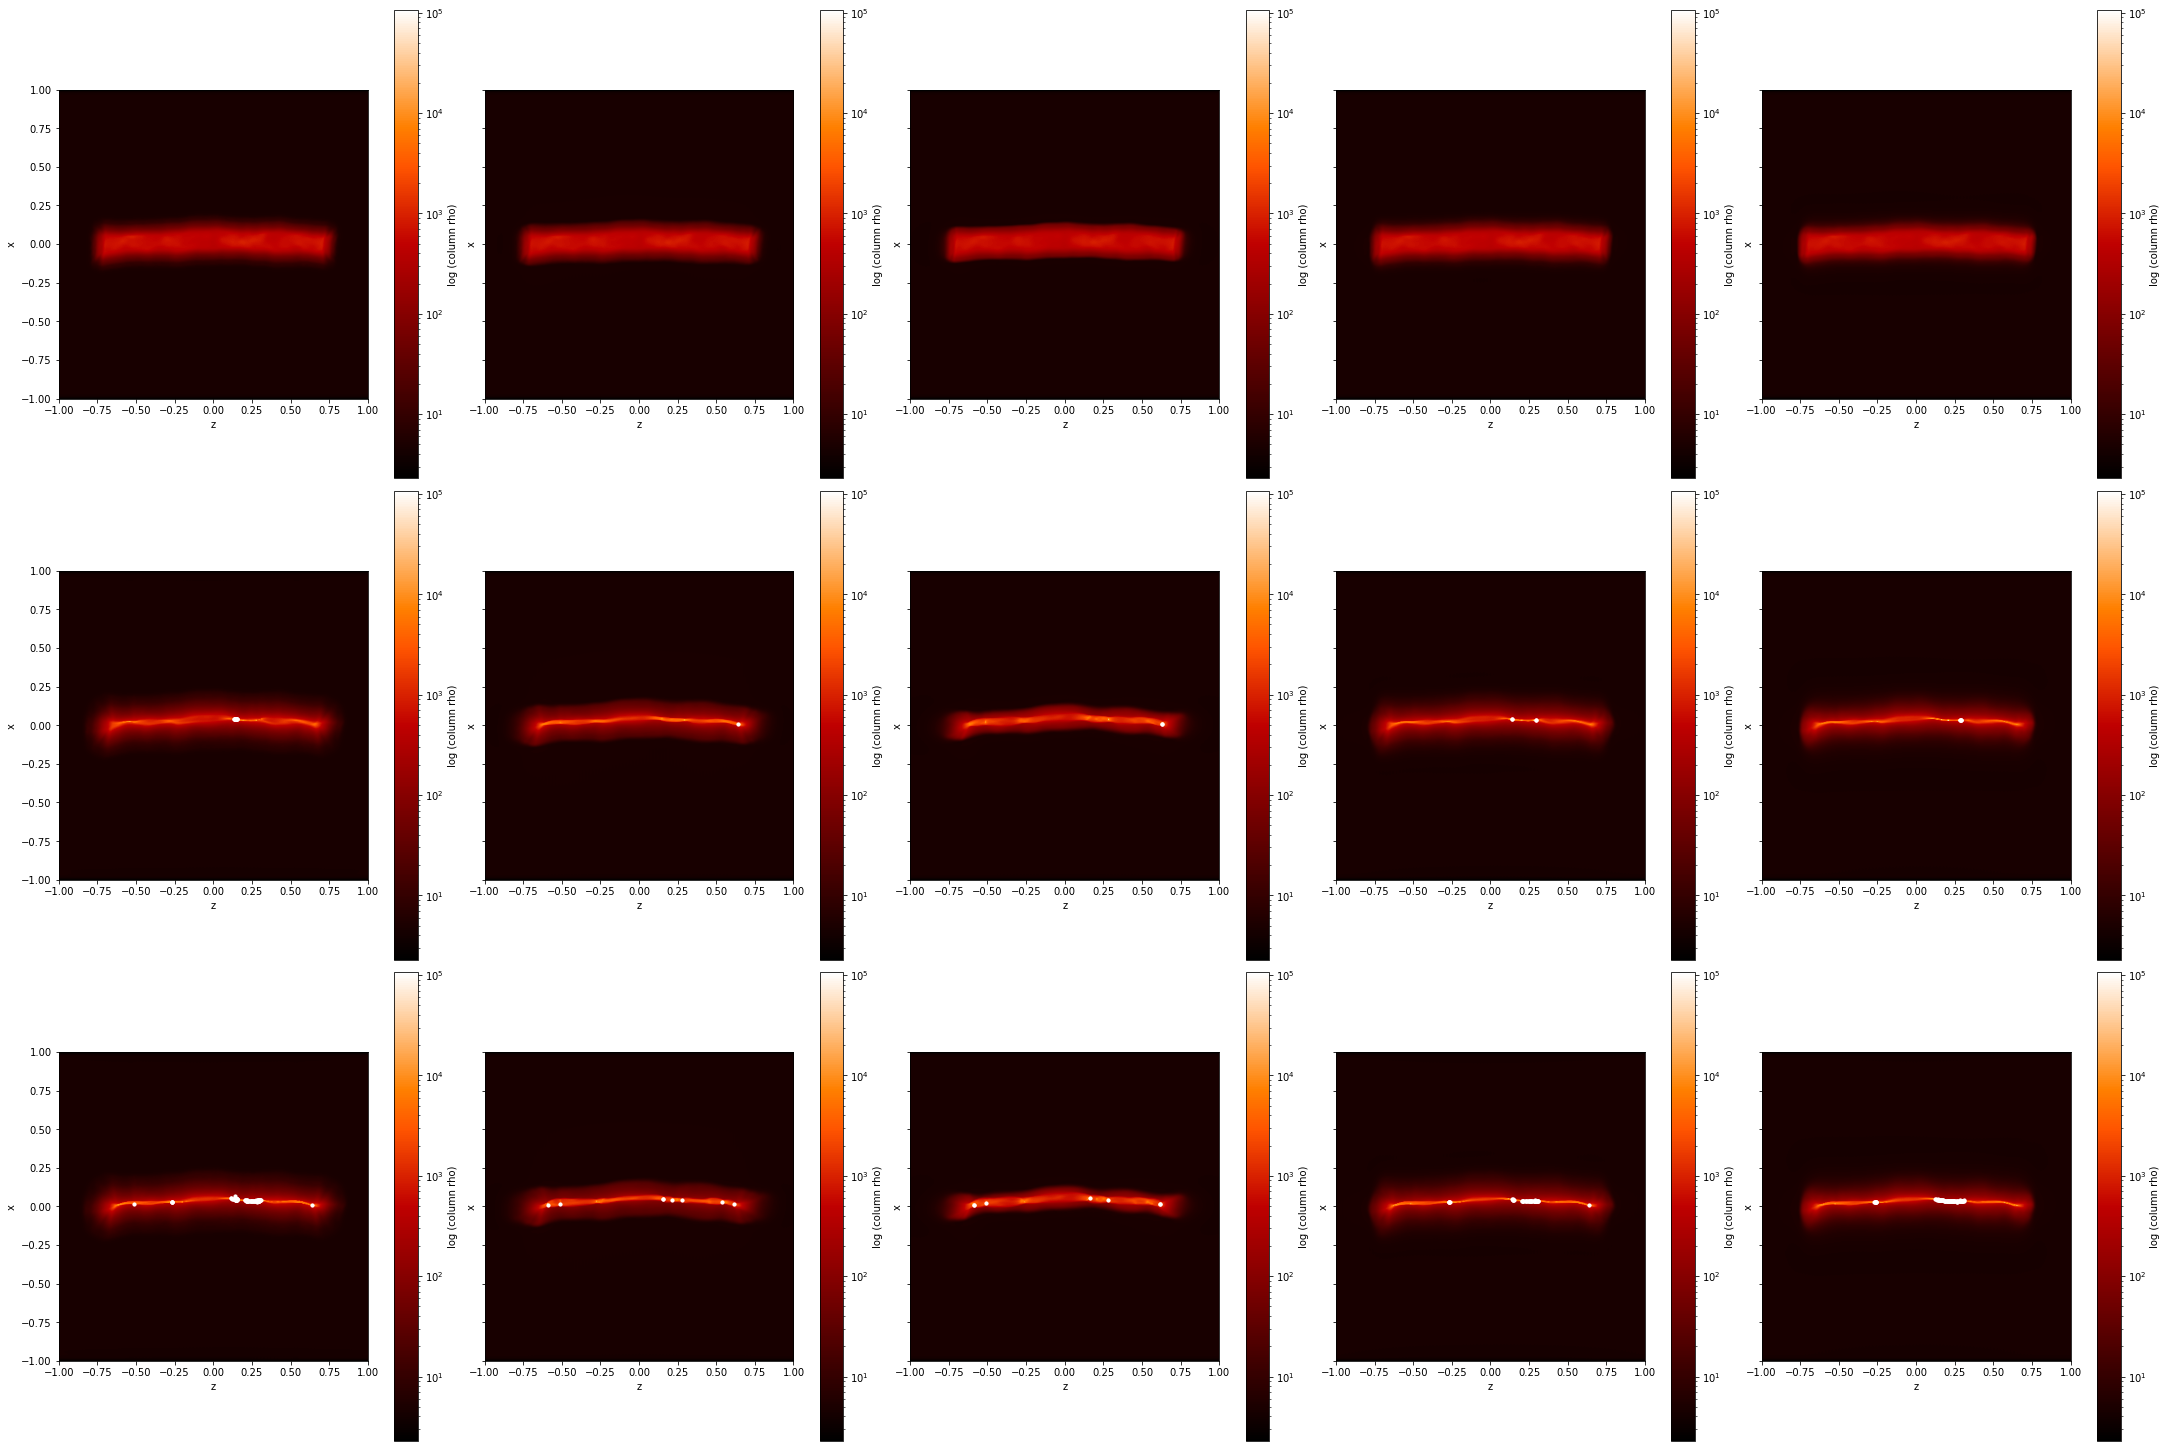

In [10]:
plot('filelistplot-M3A1', 2.288093811148108, 107154.88238115577)

---
Some tests:

In [18]:
sdf  = mysarracen.read_phantom('/work8/armin/phantom/filament32/turb25_00015', separate_types=None)
# sdf2, sink2  = mysarracen.read_phantom('/work8/armin/phantom/filament32/turb25_00046', separate_types='sinks')
sdf2  = mysarracen.read_phantom('/work8/armin/phantom/filament32/turb25_00046', separate_types=None)

In [19]:
sdf

,x,y,z,vx,vy,vz,pressure,h,alpha,divv,poten,dt
0,-0.048893,-0.188505,-0.795330,-2.002085,-8.480975,-3.412877,46.090818,0.016706,0.0,14.344975,-0.000360,0.000123
1,-0.041803,-0.180619,-0.796146,-2.382541,-8.392882,-4.003780,50.487997,0.016206,0.0,41.290489,-0.000363,0.000123
2,-0.027865,-0.176769,-0.797766,-1.610327,-8.223066,-4.337748,51.844630,0.016064,0.0,102.303513,-0.000366,0.000123
3,-0.022078,-0.172154,-0.802054,-0.560167,-7.317732,-5.335388,53.279556,0.015918,0.0,70.894867,-0.000365,0.000123
4,-0.028089,-0.165090,-0.828113,-1.456254,-6.301760,-6.415142,32.380976,0.018792,0.0,46.263676,-0.000354,0.000123
...,...,...,...,...,...,...,...,...,...,...,...,...
4684823,0.886507,0.996106,1.989060,-0.031387,-0.007188,-0.003223,9.137485,0.028651,0.0,0.553578,-0.000146,0.000982
4684824,0.913182,0.996109,1.989058,-0.028274,-0.006535,-0.003856,9.134239,0.028654,0.0,0.566107,-0.000145,0.000982
4684825,0.939898,0.996105,1.989061,-0.025973,-0.008900,-0.002755,9.128630,0.028660,0.0,0.583350,-0.000145,0.000982
4684826,0.966563,0.996103,1.989064,-0.025190,-0.009520,-0.002050,9.129679,0.028659,0.0,0.823350,-0.000144,0.000982


In [10]:
sink2

,x,y,z,m,h,hsoft,maccreted,spinx,spiny,spinz,tlast,vx,vy,vz
0,0.064234,0.066521,0.270943,0.188281,0.000184,0.0,0.188281,-0.000279,-0.000188,0.000259,0.0,5.403141,2.352577,-1.93725


In [15]:
sdf.describe()

,x,y,z,vx,vy,vz,pressure,h,alpha,divv,poten,dt
count,4.684828e+06,4.684828e+06,4.684828e+06,4.684828e+06,4.684828e+06,4.684828e+06,4.684828e+06,4.684828e+06,4.684828e+06,4.684828e+06,4.684828e+06,4.684828e+06
mean,1.974144e-02,1.349261e-02,4.392676e-03,1.870016e+00,1.278347e+00,4.165438e-01,9.224053e+03,9.765011e-03,1.005208e-01,-1.196243e+01,-6.152506e-04,3.695333e-04
std,2.935847e-01,2.928214e-01,6.896444e-01,2.429266e+00,2.268418e+00,1.525258e+00,1.004548e+04,1.106570e-02,1.343827e-01,1.154689e+02,2.516692e-04,3.549304e-04
min,-9.934071e-01,-9.961723e-01,-1.989090e+00,-1.334218e+01,-1.388888e+01,-1.520491e+01,8.937225e+00,1.640784e-03,0.000000e+00,-5.410432e+02,-9.714919e-04,6.135625e-05
25%,-2.169288e-02,-2.468355e-02,-4.525221e-01,2.330432e-02,-5.361198e-02,-3.935354e-01,5.165089e+01,2.371968e-03,4.014461e-03,-6.028941e+01,-8.079798e-04,1.227125e-04
50%,2.618709e-02,1.807708e-02,2.852270e-02,1.533920e+00,7.208635e-01,5.032803e-02,5.658378e+03,3.361360e-03,7.603629e-02,1.142320e-01,-7.131612e-04,2.454250e-04
75%,7.296748e-02,5.941085e-02,4.440451e-01,3.581291e+00,2.706088e+00,9.962882e-01,1.610313e+04,1.608372e-02,1.427677e-01,5.746467e+01,-4.303415e-04,4.908500e-04
max,9.933162e-01,9.961276e-01,1.989083e+00,1.628893e+01,1.477644e+01,1.675923e+01,4.864999e+04,2.886322e-02,1.000000e+00,4.487448e+02,-1.436596e-04,9.817000e-04


0.8172241424431114 314.35473203151025
0.7347517521377326 8407.958830176069


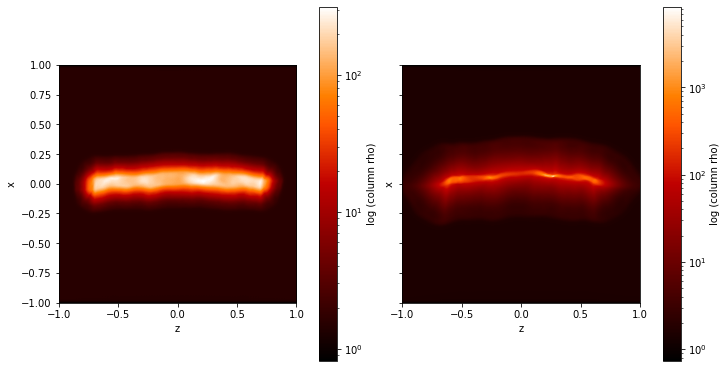

In [16]:
fig, (ax1, ax2) = plt.subplots(1, 2, layout='constrained', figsize=(10,5),  sharey=True)
# ax1 = plt.subplot(1, 2, 1)
ax, dmin, dmax = sdf.render('rho', x='z', y='x', xlim=(-1, 1), ylim=(-1, 1), log_scale=True, x_pixels=500, y_pixels=500, ax=ax1, cbar=True)
print(dmin, dmax)
# ax2 = plt.subplot(1, 2, 2)
ax, dmin, dmax = sdf2.render('rho', x='z', y='x', xlim=(-1, 1), ylim=(-1, 1), log_scale=True, x_pixels=500, y_pixels=500, ax=ax2, cbar=True,);
print(dmin, dmax)